<a href="https://colab.research.google.com/github/sasireddyvari/Python/blob/master/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**One hot encoding to handle multiple categories in one feature**

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/mercedes-benz-data-exploration.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/mercedes-benz-data-exploration.zip
   creating: mercedes-benz-data-exploration/
   creating: mercedes-benz-data-exploration/sample_submission.csv/
  inflating: mercedes-benz-data-exploration/sample_submission.csv/sample_submission.csv  
   creating: mercedes-benz-data-exploration/test.csv/
  inflating: mercedes-benz-data-exploration/test.csv/test.csv  
   creating: mercedes-benz-data-exploration/train.csv/
  inflating: mercedes-benz-data-exploration/train.csv/train.csv  


In [4]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/mercedes-benz-data-exploration/train.csv/train.csv',usecols=['X1','X2','X3','X4','X5','X6'])

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [ ]:
for col in data:
  print(col ,':', len(data[col].unique()) , 'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [ ]:
data_encoding=pd.get_dummies(data,drop_first=True)

In [ ]:
data_encoding.shape

(4209, 117)

**As we did one hot encoding for 5 random variables but got 117 random variables. This might increase dimensionality , Hence one hot is done for most repeated categories**

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [ ]:
len(data['X1'].unique())

27

In [ ]:
data['X1'].value_counts().sort_values(ascending=False)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [ ]:
data['X1'].value_counts().sort_values(ascending=False).head(20)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
Name: X1, dtype: int64

In [ ]:
data['X1'].value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [ ]:
top_10=[x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
def one_hot_top(df,variable,top_categories):
  for category in top_categories:
    data[variable +'_'+ category]=np.where(data[variable]==category,1,0)


(4209, 16)

In [ ]:
data=pd.read_csv('/content/mercedes-benz-data-exploration/train.csv/train.csv',usecols=['X1','X2','X3','X4','X5','X6'])

In [ ]:
for variable in data:
  one_hot_top(data,variable,top_10)
data.shape

(4209, 66)

**Count/Frequency Encoding : Ordinal Technique**

In [ ]:
data=pd.read_csv('/content/mercedes-benz-data-exploration/train.csv/train.csv',usecols=['X1','X2','X3','X4','X5','X6'])

In [ ]:
data.head(10)

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d
5,b,e,c,d,g,h
6,r,e,f,d,f,h
7,l,as,f,d,f,j
8,s,as,e,d,f,i
9,b,aq,c,d,f,a


In [ ]:
data.shape

(4209, 6)

In [ ]:
for i in data:
  print(i,len(data[i].unique()),'labels/categories')

X1 27 labels/categories
X2 44 labels/categories
X3 7 labels/categories
X4 4 labels/categories
X5 29 labels/categories
X6 12 labels/categories


In [ ]:
data.X1.value_counts().to_dict()

{'a': 143,
 'aa': 833,
 'ab': 3,
 'b': 592,
 'c': 121,
 'd': 3,
 'e': 33,
 'f': 23,
 'g': 6,
 'h': 29,
 'i': 203,
 'j': 22,
 'k': 17,
 'l': 590,
 'm': 32,
 'n': 19,
 'o': 82,
 'p': 9,
 'q': 3,
 'r': 251,
 's': 598,
 't': 31,
 'u': 37,
 'v': 408,
 'w': 52,
 'y': 23,
 'z': 46}

In [ ]:
data_frequency=data.X1.value_counts().to_dict()
data_frequency

{'a': 143,
 'aa': 833,
 'ab': 3,
 'b': 592,
 'c': 121,
 'd': 3,
 'e': 33,
 'f': 23,
 'g': 6,
 'h': 29,
 'i': 203,
 'j': 22,
 'k': 17,
 'l': 590,
 'm': 32,
 'n': 19,
 'o': 82,
 'p': 9,
 'q': 3,
 'r': 251,
 's': 598,
 't': 31,
 'u': 37,
 'v': 408,
 'w': 52,
 'y': 23,
 'z': 46}

In [ ]:
data.X1=data.X1.map(data_frequency)
print(data)

      X1  X2 X3 X4  X5 X6
0    NaN  at  a  d   u  j
1    NaN  av  e  d   y  l
2    NaN   n  c  d   x  j
3    NaN   n  f  d   x  l
4    NaN   n  f  d   h  d
...   ..  .. .. ..  .. ..
4204 NaN  as  c  d  aa  d
4205 NaN   t  d  d  aa  h
4206 NaN   r  a  d  aa  g
4207 NaN   e  f  d  aa  l
4208 NaN  ae  c  d  aa  g

[4209 rows x 6 columns]


In [ ]:
Disadvantage is Might work or might not work
The another one is if two categories repeated same, then we loose some data

**Ordinal Encoding**

In [ ]:
import pandas as pd
import datetime

In [ ]:
data=datetime.datetime.today()
data_list=[data-datetime.timedelta(days=x) for x in range(0,20)]
data_list

[datetime.datetime(2020, 12, 6, 15, 27, 5, 147457),
 datetime.datetime(2020, 12, 5, 15, 27, 5, 147457),
 datetime.datetime(2020, 12, 4, 15, 27, 5, 147457),
 datetime.datetime(2020, 12, 3, 15, 27, 5, 147457),
 datetime.datetime(2020, 12, 2, 15, 27, 5, 147457),
 datetime.datetime(2020, 12, 1, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 30, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 29, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 28, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 27, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 26, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 25, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 24, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 23, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 22, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 21, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 20, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 19, 15, 27, 5, 147457),
 datetime.datetime(2020, 11, 18, 15, 27, 5, 147457),

In [ ]:
df = pd.DataFrame(data_list)

In [ ]:
df.columns=['day']
df

,day
0,2020-12-06 15:27:05.147457
1,2020-12-05 15:27:05.147457
2,2020-12-04 15:27:05.147457
3,2020-12-03 15:27:05.147457
4,2020-12-02 15:27:05.147457
5,2020-12-01 15:27:05.147457
6,2020-11-30 15:27:05.147457
7,2020-11-29 15:27:05.147457
8,2020-11-28 15:27:05.147457
9,2020-11-27 15:27:05.147457


In [ ]:
df['dayofweek']=df['day'].dt.dayofweek

In [ ]:
df

,day,dayofweek
0,2020-12-06 15:27:05.147457,6
1,2020-12-05 15:27:05.147457,5
2,2020-12-04 15:27:05.147457,4
3,2020-12-03 15:27:05.147457,3
4,2020-12-02 15:27:05.147457,2
5,2020-12-01 15:27:05.147457,1
6,2020-11-30 15:27:05.147457,0
7,2020-11-29 15:27:05.147457,6
8,2020-11-28 15:27:05.147457,5
9,2020-11-27 15:27:05.147457,4


**Handling Missing Values:**

Missing completely at Random(MCAR): Absolutely No Relationship between the data missing and any other values

Missing Data Not at Random(MDAR): Some relationship

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
data['Cabin_null']=np.where(data['Cabin'].isnull(),1,0)
data.columns.get_loc('Cabin_null')

12

In [ ]:
# data.drop(['cabin_null'],inplace=True,axis=1)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [ ]:
data['Cabin_null'].mean() # 77% of missing values

0.7710437710437711

In [ ]:
data.columns.get_loc('Cabin_null')

12

In [ ]:
data.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [ ]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Survived','Age','Fare'])

In [ ]:
def median_impute_nan(df,variable,median):
  #df[variable +'_median']=df[variable].fillna(median)
  df[variable +'_median']=np.where(df[variable].isnull(),median,df[variable])

In [ ]:
median=data.Age.median()
median

28.0

In [ ]:
median_impute_nan(data,'Age',median)
data.head(10)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [ ]:
data.Age.std()

14.526497332334044

In [ ]:
data.Age_median.std()

13.019696550973194

In [ ]:
import matplotlib.pyplot as plt

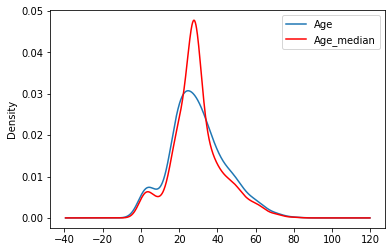

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)
data['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

**Random Sample Imputation**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Survived','Age','Fare'])

In [ ]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
data.Age.median()

28.0

In [ ]:
data.Age.dropna().sample(data.Age.isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0)
#random_sample_index=data[data.Age.isnull()].index

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def rndm_impute_nan(df,variable,median):
  df[variable +'_median']=df[variable].fillna(median)
  df[variable +'_random']=df[variable]
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable +'_random']=random_sample


In [ ]:
rndm_impute_nan(data,'Age',median)
data.head(10)


,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [ ]:
data.Age_random.isnull().sum()

0

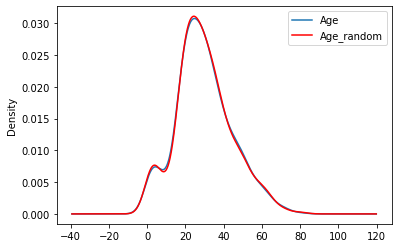

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax) # kernel density estimation
data['Age_random'].plot(kind='kde',ax=ax,color='red')
#data['Age_random'].plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

**Capturing NAN with new features**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Survived','Age','Fare'])

In [ ]:
data['Age_NAN']=np.where(data['Age'].isnull(),1,0)

In [ ]:
data.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
data.Age_NAN.isnull().sum()

0

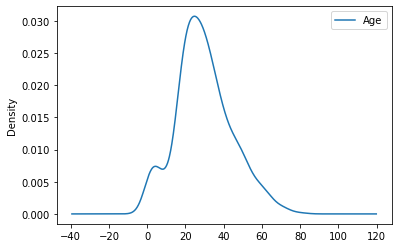

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
data['Age'].plot(kind='kde',ax=ax) # kernel density estimation
#data['Age_NAN'].plot(kind='kde',ax=ax,color='red')
#data['Age_random'].plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

**End of distribution Imputation**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Survived','Age','Fare'])

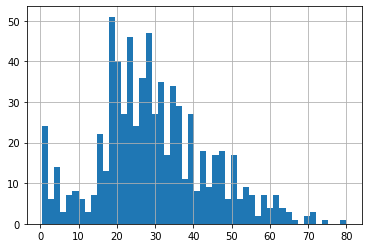

In [ ]:
data.Age.hist(bins=50)

In [ ]:
data.Age.mean()

29.69911764705882

In [ ]:
extreme=data.Age.mean()+3 * data.Age.std()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


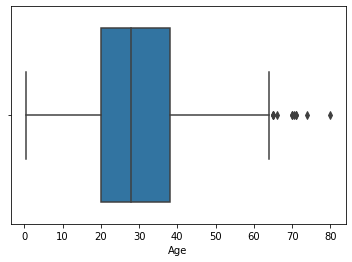

In [ ]:
sns.boxplot('Age',data=data)

In [ ]:
def end_dist_impute_nan(df,variable,median,extreme):
  df[variable+'_end_dist']=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
end_dist_impute_nan(data,'Age',data.Age.median(),extreme)

In [ ]:
data.head(10)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


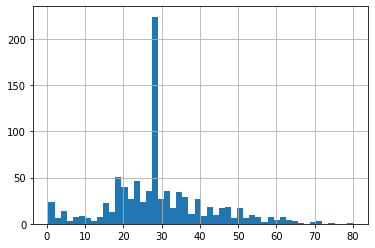

In [ ]:
data.Age.hist(bins=50)

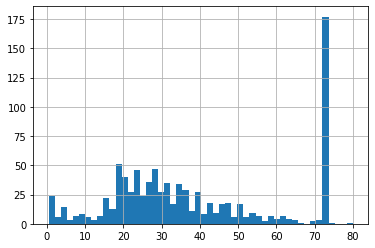

In [ ]:
data.Age_end_dist.hist(bins=50)

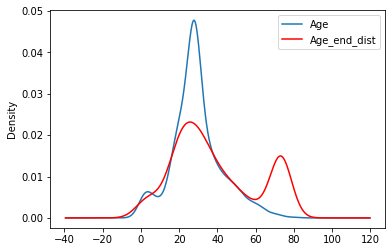

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
data['Age'].plot(kind='kde',ax=ax) # kernel density estimation
data['Age_end_dist'].plot(kind='kde',ax=ax,color='red')
#data['Age_random'].plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


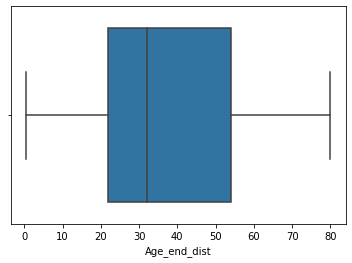

In [ ]:
sns.boxplot('Age_end_dist',data=data)

In [ ]:
data['Age']=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Age'])

In [ ]:
data['Age_median']=data['Age']

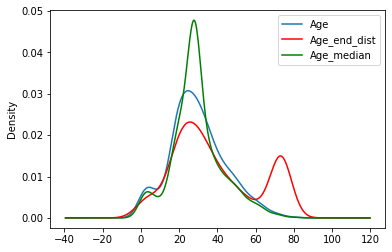

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
data['Age'].plot(kind='kde',ax=ax) # kernel density estimation
data['Age_end_dist'].plot(kind='kde',ax=ax,color='red')
data['Age_median'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

**Arbitrary Value Imputation**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Survived','Age','Fare'])

In [ ]:
def arbi_impute_nan(df,variable):
  df[variable +'_zero']=df[variable].fillna(0) # least outlier
  df[variable +'_hundred']=df[variable].fillna(100) # Maximum Outlier

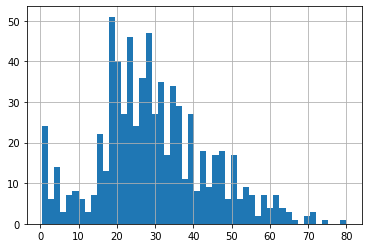

In [ ]:
data.Age.hist(bins=50)

In [ ]:
arbi_impute_nan(data,'Age')

In [ ]:
data.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


**Missing values in Categorical Variables**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan.csv')
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

**Compute Frequency**


In [ ]:
data.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [ ]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

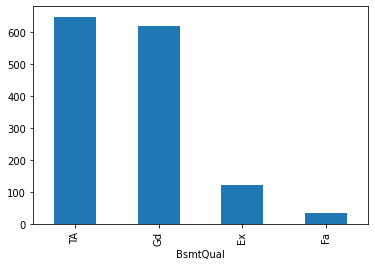

In [ ]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [ ]:
data.BsmtQual.value_counts(ascending=False)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

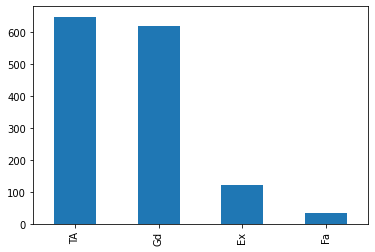

In [ ]:
data.BsmtQual.value_counts().plot.bar()

In [ ]:
data.FireplaceQu.value_counts(ascending=False)

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
data.GarageType.mode()[0]

'Attchd'

In [ ]:
data.GarageType.value_counts(ascending=False).index[0]

'Attchd'

In [ ]:
data.GarageType.value_counts(ascending=False)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
def Freq_impute_nan(df,variable):
  #freq_category=data.GarageType.mode()[0]
  freq_category=data.GarageType.value_counts(ascending=False).index[0]
  df[variable].fillna(freq_category,inplace=True)

In [ ]:
for feature in data:
  Freq_impute_nan(data,feature)

In [ ]:
data.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [ ]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
def impute_nan_new(df,variable):
  df[variable + '_newvar']=np.where(df[variable].isnull(),"Missing",df[variable])

data=data.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice_newvar'],axis=1)

In [ ]:
for feature in data:
  impute_nan_new(data,feature)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [ ]:
data=data.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice_newvar'],axis=1)

In [ ]:
data.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


**Robust Scalar**
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Survived','Age','Fare'])

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
df_robust_scaler.head(10)

,Survived,Age,Fare
0,0.0,-0.335664,-0.312011
1,1.0,0.559441,2.461242
2,1.0,-0.111888,-0.282777
3,1.0,0.391608,1.673732
4,0.0,0.391608,-0.277363
5,0.0,NaN,-0.259680
6,0.0,1.454545,1.620136
7,0.0,-1.454545,0.286744
8,1.0,-0.055944,-0.143827
9,1.0,-0.783217,0.676348


#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv',usecols=['Survived','Age','Fare'])

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [ ]:
data['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
data['Age'].isnull().sum()

0

In [9]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt 
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

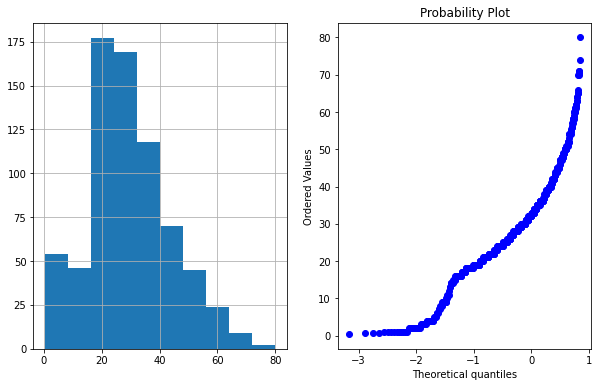

In [9]:
plot_data(data,'Age')

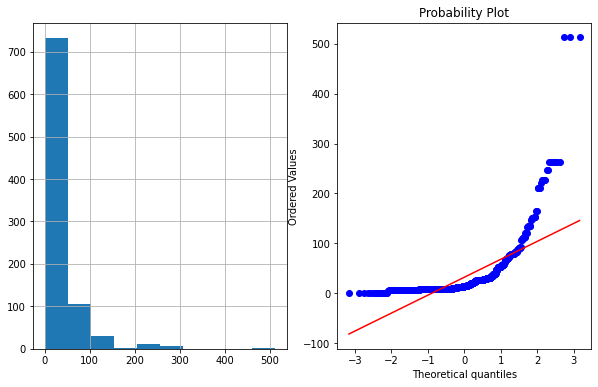

In [10]:
plot_data(data,'Fare')

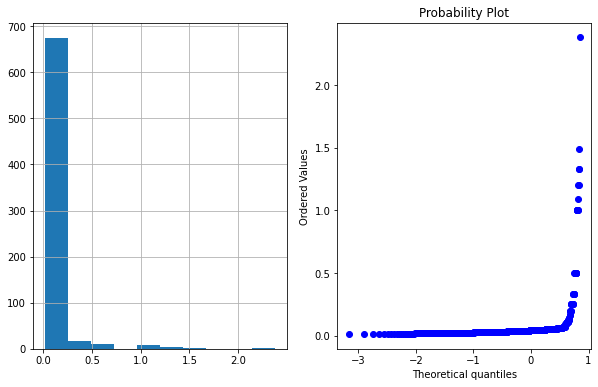

In [18]:
data['Age_reci']=1/data['Age']
plot_data(data,'Age_reci')

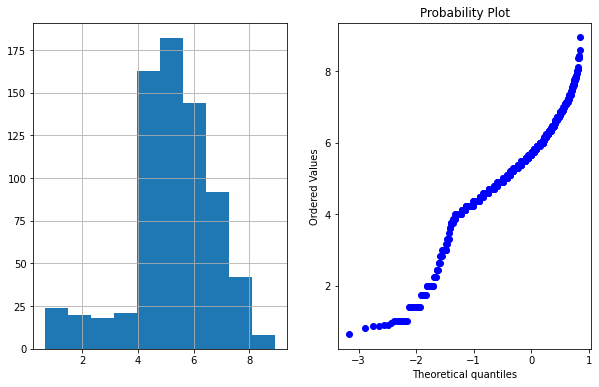

In [19]:
data['Age_sqrt']=data['Age'] **(1/2)
plot_data(data,'Age_sqrt')

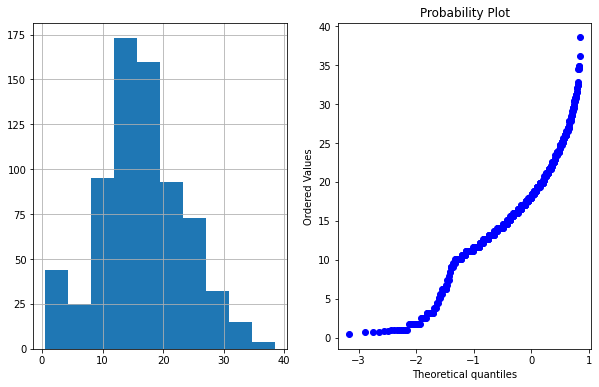

In [24]:
data['Age_exponential']=data.Age**(1/1.2)
plot_data(data,'Age_exponential')

In [244]:
data['Age_Boxcox'],parameters=stat.boxcox(data['Age'])

In [245]:
data.head()

,Survived,Age,Fare,Age_Boxcox
0,0,22.0,7.2500,13.468119
1,1,38.0,71.2833,21.498728
2,1,26.0,7.9250,15.563417
3,1,35.0,53.1000,20.056110
4,0,35.0,8.0500,20.056110


In [247]:
print(parameters) # Lambda value

0.7964531473656952


In [4]:
data =data[data['Fare'] !=0]

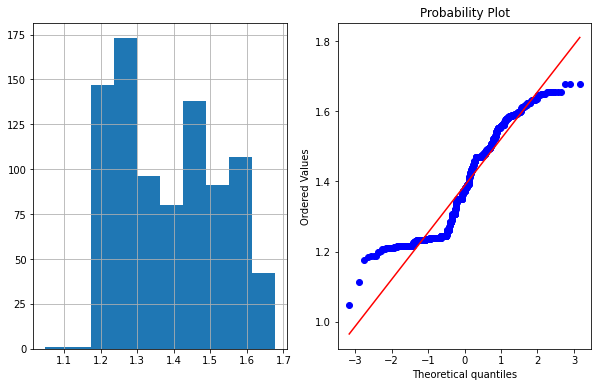

In [10]:
#data['Age_Fare']=np.log1p('Fare')
data['Age_Fare'],parameters=stat.boxcox(data['Fare']+1)
plot_data(data,'Age_Fare')